# 개요 / 가설

연도별로 전체 박스오피스의 관객수와 매출액의 변화를 알아본다.

평점이 높다면 관객수와 매출액이 높을 것이다. (흥행10걸 / 전체)

# 데이터 수집

In [1]:
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

In [2]:
수상작 = pd.read_csv("수상작_리뷰.csv", sep=",", index_col='Unnamed: 0', encoding='cp949')
흥행작 = pd.read_csv("1020흥행작.csv", sep=",", index_col='Unnamed: 0', encoding='cp949')
전체흥행작 = pd.read_csv("전체 박스오피스.csv", sep=",", index_col='Unnamed: 0', encoding='cp949')

# 전처리

In [3]:
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Mal' in f.name]

plt.rc('font', family="Malgun Gothic")

In [4]:
흥행작_요약 = 흥행작[['제목', '관객수', '매출액', '왓챠평점', '네티즌평점', '평론가평점']]
흥행작_요약 = 흥행작_요약.dropna()
흥행작_요약['평균평점'] = (흥행작_요약['왓챠평점']*2 + 흥행작_요약['네티즌평점'] + 흥행작_요약['평론가평점']) / 3
흥행작_요약.head()

,제목,관객수,매출액,왓챠평점,네티즌평점,평론가평점,평균평점
0,아바타,8101481,8.081990e+10,3.9,9.07,8.83,8.566667
1,아저씨,6153307,4.691262e+10,3.9,9.24,6.25,7.763333
2,인셉션,5818692,4.332849e+10,4.4,9.23,7.93,8.653333
3,의형제,5401659,4.005799e+10,3.5,8.87,7.55,7.806667
4,아이언맨 2,4416203,3.256592e+10,4.0,7.37,5.47,6.946667


In [5]:
전체흥행작_요약 = pd.pivot_table(전체흥행작, index=['연도'], aggfunc = 'sum')
전체흥행작_요약['매출액'] = 전체흥행작_요약['매출액']/10000
전체흥행작_요약 = 전체흥행작_요약.reset_index()
전체흥행작_요약

,연도,관객수,매출액
0,2010,142680895,1.120222e+08
1,2011,153677914,1.191893e+08
2,2012,188563031,1.410208e+08
3,2013,206937072,1.509100e+08
4,2014,207556289,1.612804e+08
5,2015,210020013,1.661882e+08
6,2016,207664033,1.673701e+08
7,2017,210880902,1.689751e+08
8,2018,209192440,1.759987e+08
9,2019,218947998,1.857006e+08


# 분석

In [6]:
#1. 평균평점 <-> 관객수의 상관계수
np.corrcoef(흥행작_요약['평균평점'],  흥행작_요약['관객수'])

array([[1.        , 0.39500396],
       [0.39500396, 1.        ]])

0.4 수준의 상관계수로, 관객수가 평균평점에 좌지우지 되는 수준은 아니다.
하지만, 실제로 영화커뮤니티, 네티즌, 전문가의 평점은 관객수와 무관하지 않다는 점을 확인할 수 있다.

In [7]:
#2. 왓챠평점 <-> 관객수의 상관계수
np.corrcoef(흥행작_요약['왓챠평점'],  흥행작_요약['관객수'])

array([[1.        , 0.48127275],
       [0.48127275, 1.        ]])

왓챠평점과 관객수의 상관계수는 0.5에 근접한 0.4812로, 평균평점보다도 흥행도와 큰 관련성을 띄는 것으로 파악되었다. 왓챠피디아의 서비스가 관심사와 평점 등을 토대로 다른 유저에게 영화를 추천해주는 서비스이다보니, 실제로 입소문을 많이 타는 영화에 평점이 더 높게 기록되었을 것으로 추측된다.

In [8]:
#3. 네티즌평점 <-> 관객수의 상관계수
np.corrcoef(흥행작_요약['네티즌평점'],  흥행작_요약['관객수'])

array([[1.        , 0.37023845],
       [0.37023845, 1.        ]])

In [9]:
#4. 평론가평점 <-> 관객수의 상관계수
np.corrcoef(흥행작_요약['평론가평점'],  흥행작_요약['관객수'])

array([[1.        , 0.15229267],
       [0.15229267, 1.        ]])

반면 평론가평점과 관객수의 상관계수는 0.1522로, 관객수가 평론가평점과 큰 상관이 없는것으로 보여진다. 그 이유는 평론가평점은 영화의 예술성, 기술 등을 기준으로 작성되며, 다른 평점 기준에 비해 평점이 낮게 책정되는 특성 때문으로 보인다.

# 시각화

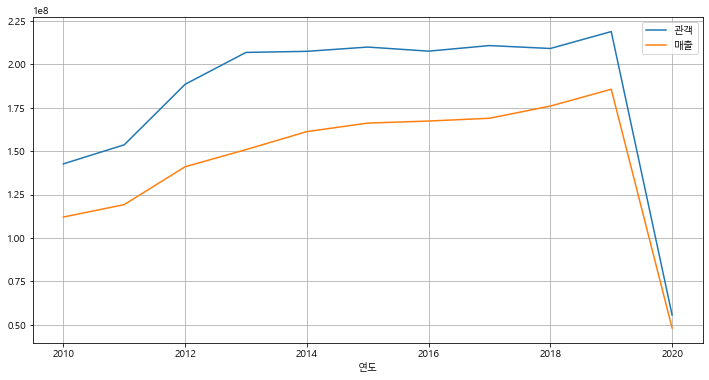

In [10]:
#0. 각 연도별 전체 박스오피스 관객수와 매출액의 변화 추이 (매출/10000)

fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(전체흥행작_요약['연도'], 전체흥행작_요약['관객수'], label='관객')
plt.plot(전체흥행작_요약['연도'], 전체흥행작_요약['매출액'], label='매출')
plt.legend()

plt.grid()
plt.xlabel("연도")
plt.legend()
plt.show()

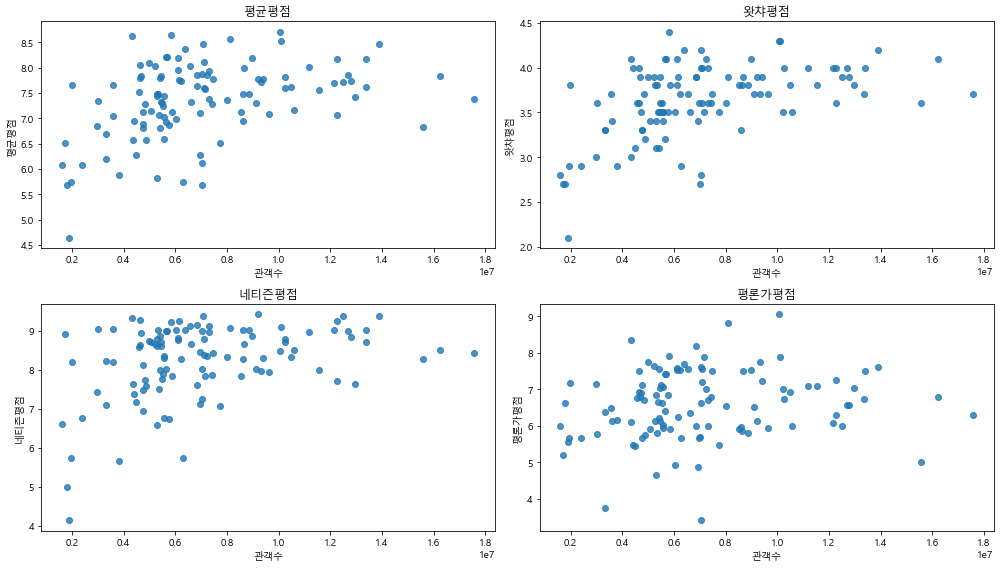

In [11]:
#1. 평균평점 / 왓차평점 / 네티즌평점 / 평론가평점 <-> 관객수의 상관관계 시각화

fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(14,8))

sns.regplot( x = 흥행작_요약["관객수"], y =흥행작_요약["평균평점"], fit_reg = False, ax=axes[0,0])
sns.regplot( x = 흥행작_요약["관객수"], y =흥행작_요약["왓챠평점"], fit_reg = False, ax=axes[0,1])
sns.regplot( x = 흥행작_요약["관객수"], y =흥행작_요약["네티즌평점"], fit_reg = False, ax=axes[1,0])
sns.regplot(x = 흥행작_요약["관객수"], y =흥행작_요약["평론가평점"], fit_reg = False, ax=axes[1,1])

axes[0,0].title.set_text("평균평점")
axes[0,1].title.set_text("왓챠평점")
axes[1,0].title.set_text("네티즌평점")
axes[1,1].title.set_text("평론가평점")

fig.tight_layout()

plt.show()